In this notebook we have:
    
    -NiO inelastic TEM
    -NiO inelastic STEM

In [3]:
import sys
import requests
sys.path.insert(0,'/home/jcdn500/Documents/abTEM')
sys.path.insert(0,'/home/jcdn500/Documents/abTEM/abtem')
import numpy as np
from abtem import *
import matplotlib.pyplot as plt

from abtem.waves import PlaneWave
from ase.io import read, write
from abtem.potentials import Potential

/home/jcdn500/.local/lib/python3.8/site-packages/ase/calculators/neighborlist.py:5: UserWarning: Moved to ase.neighborlist
  warnings.warn('Moved to ase.neighborlist')


# NiO TEM #

Get NiO atomic positions

In [6]:
atoms = read('/home/jcdn500/Documents/abTEM/Test_USe/NiO.cif')

In [7]:
atoms.positions

array([[0.        , 0.        , 0.        ],
       [0.        , 2.10830979, 2.10830979],
       [2.10830979, 0.        , 2.10830979],
       [2.10830979, 2.10830979, 0.        ]])

Set the magnnetic moments since we didn't use a .mcif file.

In [8]:
import sympy as sym

## Set magnetic moments
pi=sym.pi
magmoms=[[2,np.pi,0], [2,0,0], [2,0,0], [2,np.pi,0]]
atoms.set_initial_magnetic_moments(magmoms)

Set the J interactions

In [9]:
Js=np.zeros([2,2,3])
for i in range(2):
    for j in range(2):
        for k in range(3):
            if i==j and k==0:
                Js[i,j,k]=1.39 
            if i!=j and k==0:
                Js[i,j,k]=1.34 
            if i!=j and k==2:
                Js[i,j,k]=-19.04
print(Js)

[[[  1.39   0.     0.  ]
  [  1.34   0.   -19.04]]

 [[  1.34   0.   -19.04]
  [  1.39   0.     0.  ]]]


In [10]:
plt.rcParams['figure.figsize'] = (16,8)

Setup input to abTEM

/home/jcdn500/Documents/abTEM/abtem/base_classes.py:491: UserWarning: Overspecified simulation grid sampling ((0.00999198952606635, 0.00999198952606635) != (0.01, 0.01))
  warnings.warn(f'Overspecified simulation grid sampling ({self.sampling} != {other.sampling})')


0 1
0
[0.         0.1185784  0.04743136]
1 2
0
2 3
0
3 4
0
4 5
0
5 6
0
6 7
0
7 8
0
8 9
0


/home/jcdn500/Documents/abTEM/abtem/potentials.py:1496: RuntimeWarning: overflow encountered in exp
  Nk1 = 1/(np.exp(np.abs(self.mag_variables.eVals_full[numq,:N])/kT)-1)#np.ones_like(1/(np.exp(eigenVals[numq,:]/kT)-1))
/home/jcdn500/Documents/abTEM/abtem/potentials.py:1497: RuntimeWarning: overflow encountered in exp
  Nk2 = 1/(np.exp(np.abs(self.mag_variables.eVals_full[numq,N:])/kT)-1)


in
0 1
1
1 2
1
[0.         0.1185784  0.04743136]
2 3
1
3 4
1
4 5
1
5 6
1
6 7
1
7 8
1
8 9
1
0 1
2
1 2
2
2 3
2
[0.         0.1185784  0.04743136]
3 4
2
4 5
2
5 6
2
6 7
2
7 8
2
8 9
2
0 1
3
1 2
3
2 3
3
3 4
3
[0.         0.1185784  0.04743136]
4 5
3
5 6
3
6 7
3
7 8
3
8 9
3
0 1
4
1 2
4
2 3
4
3 4
4
4 5
4
[0.         0.1185784  0.04743136]
5 6
4
6 7
4
7 8
4
8 9
4
0 1
5
1 2
5
2 3
5
3 4
5
4 5
5
5 6
5
[0.         0.1185784  0.04743136]
6 7
5
7 8
5
8 9
5
0 1
6
1 2
6
2 3
6
3 4
6
4 5
6
5 6
6
6 7
6
[0.         0.1185784  0.04743136]
7 8
6
8 9
6
0 1
7
1 2
7
2 3
7
3 4
7
4 5
7
5 6
7
6 7
7
7 8
7
[0.         0.1185784  0.04743136]
8 9
7
0 1
8
1 2
8
2 3
8
3 4
8
4 5
8
5 6
8
6 7
8
7 8
8
8 9
8
[0.         0.1185784  0.04743136]


(<AxesSubplot: xlabel='x [Å]', ylabel='y [Å]'>,
 <matplotlib.image.AxesImage at 0x7f72ba48b4f0>)

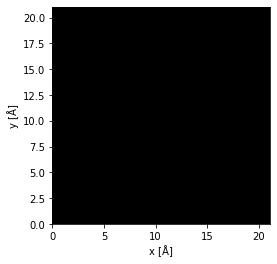

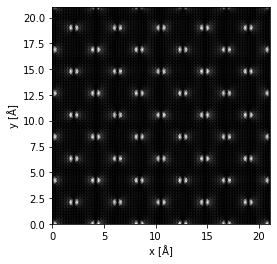

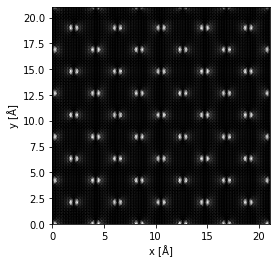

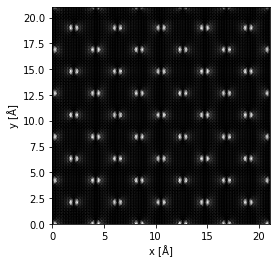

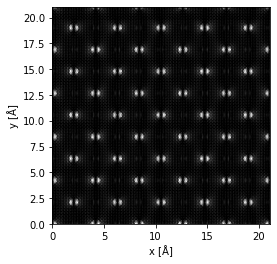

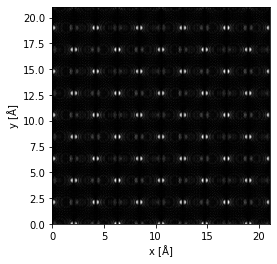

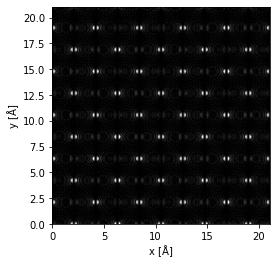

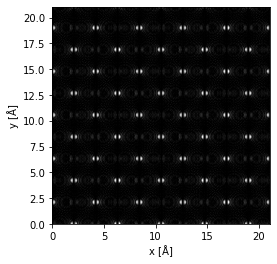

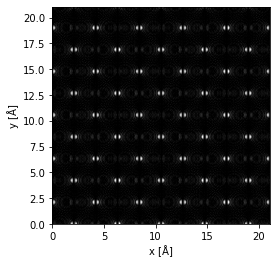

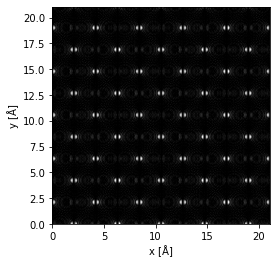

In [11]:
Input_mag=MagnonInput(atoms,
                      interaction=Js,
                      anisotropies=0,
                      qpts=np.array([[0.0,0.5,0.2]]),
                      Temperature=300.0,
                      inelastic_layer=[0])

potential = Potential(Input_mag, sampling=.01)
potential = potential.build()
firstTime=True
for i in range(potential.num_slices):
    wave = PlaneWave(energy=100e3, sampling=.01)

    potential = potential.update_inelastic_layer([i])
    pw_exit_wave = wave.multislice(potential,pbar=False)
    
    if firstTime:
        final_meansure = pw_exit_wave.intensity()
        
        final_meansure.tile([5,5]).show() 
        firstTime=False
        print('in')
    else:
        final_meansure = final_meansure + pw_exit_wave.intensity()
        final_meansure.tile([5,5]).show() 
        #plt.plot(pw_exit_wave.intensity().array[0,:])
#plt.show()

final_meansure.tile([5,5]).show()    
#plt.plot(final_meansure.array[0,:])
#plt.show()

# NiO STEM #

In [14]:
from abtem.waves import Probe

probe = Probe(energy=300e3, semiangle_cutoff=40, rolloff=.1, sampling=.01)

In [15]:
Input_mag=MagnonInput(atoms,
                      interaction=Js,
                      anisotropies=0,
                      qpts=np.array([[0.2,0.25,0.0]]),
                      Temperature=300.0,
                      inelastic_layer=[0])

potential = Potential(Input_mag, sampling=.01, slice_thickness=0.5)
potential = potential.build()

In [16]:
from abtem.scan import GridScan


for i in [11]:#range(potential.num_slices):
    probe = Probe(energy=300e3, semiangle_cutoff=40, rolloff=.1, sampling=.01)
    potential = potential.update_inelastic_layer([i])
    detector = AnnularDetector(inner=86, outer=190, save_file='./gridscan'+str(i)+'.hdf5')
    gridscan = GridScan(start=[0, 0], end=[2*2.10830979,2*2.10830979], sampling=probe.ctf.nyquist_sampling * .9)

    measurement_files = probe.scan(gridscan, [detector], potential, pbar=True)
#ax, im = potential.project().show();

#gridscan.add_to_mpl_plot(ax)

/home/jcdn500/Documents/abTEM/abtem/base_classes.py:491: UserWarning: Overspecified simulation grid sampling ((0.01, 0.01) != (0.00999198952606635, 0.00999198952606635))
  warnings.warn(f'Overspecified simulation grid sampling ({self.sampling} != {other.sampling})')


Scan:   0%|          | 0/1444 [00:00<?, ?it/s]

0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11

In [17]:
measurement_files = probe.scan(gridscan, [detector], potential, pbar=True)

Scan:   0%|          | 0/1444 [00:00<?, ?it/s]

0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11
8 9
11
0 1
11
1 2
11
2 3
11
3 4
11
4 5
11
5 6
11
6 7
11
7 8
11

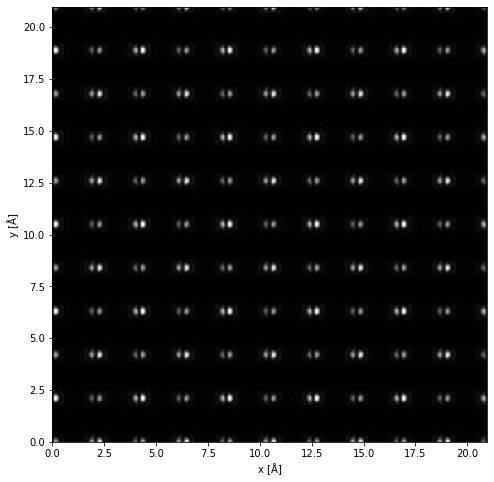

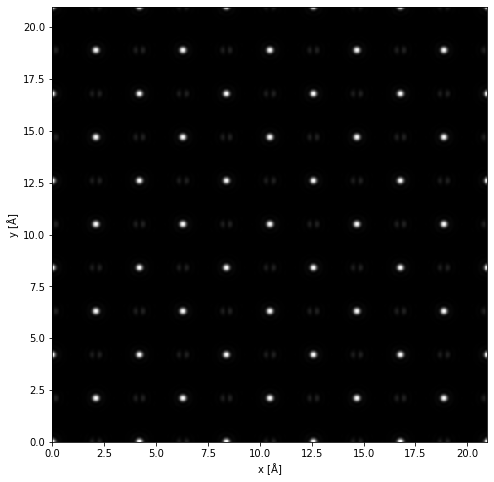

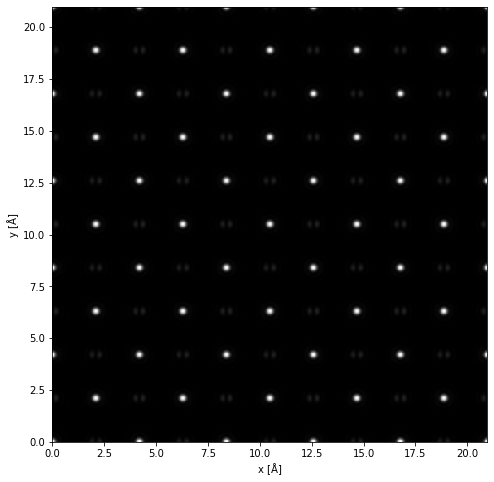

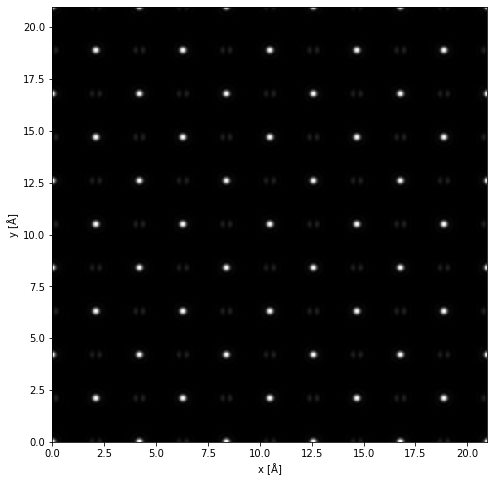

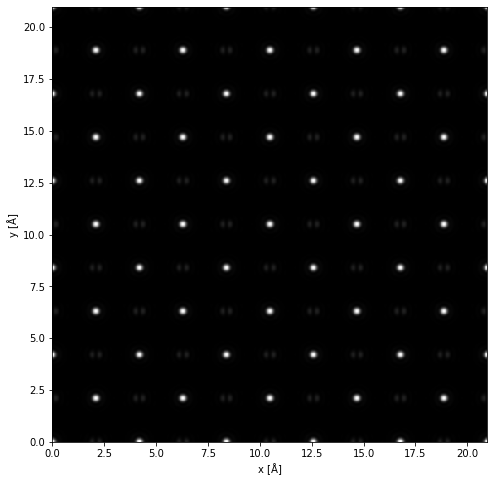

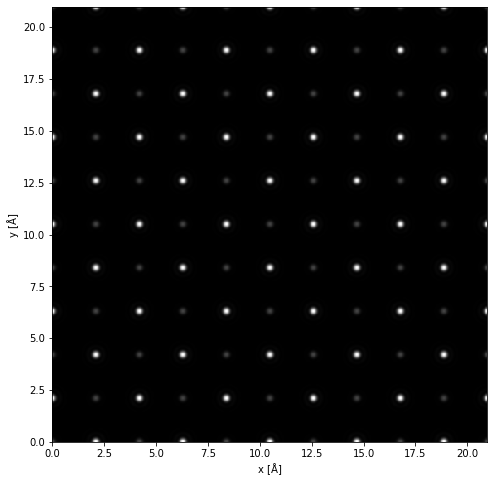

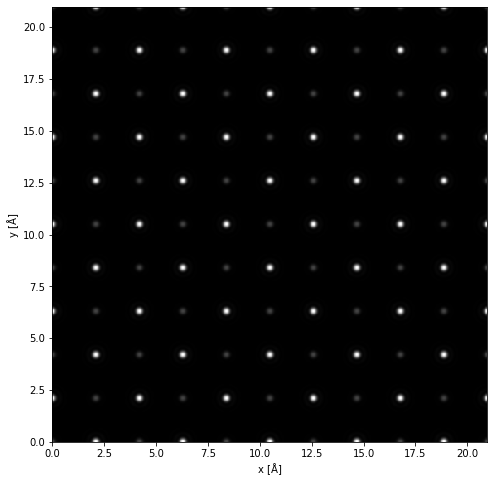

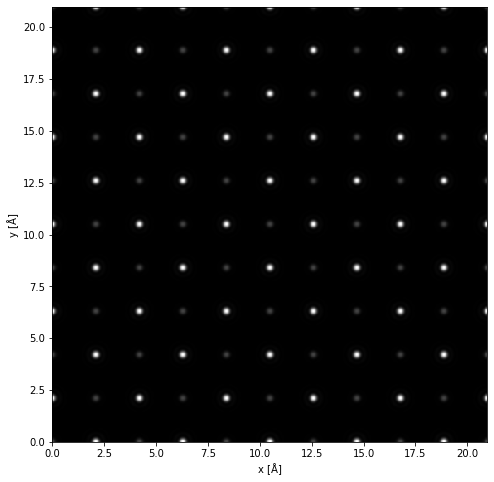

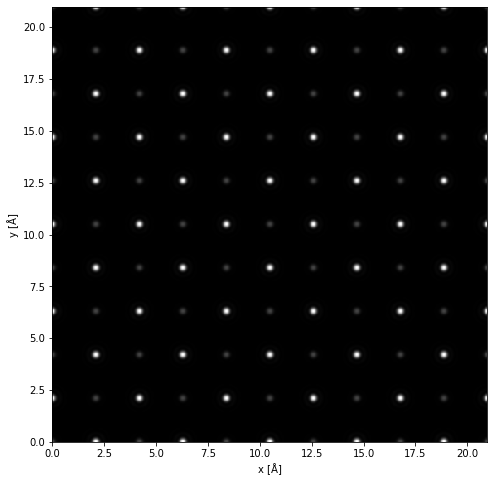

In [19]:
measurement = Measurement.read('./gridscan0.hdf5')
new_measurement = measurement.tile((5, 5))
new_measurement = new_measurement.interpolate(.04)

new_measurement.show();


for i in range(1,potential.num_slices):
    measurement = Measurement.read('./gridscan'+str(i)+'.hdf5')
    new_measurement = measurement.tile((5, 5))
    new_measurement = new_measurement.interpolate(.04)

    new_measurement.show();
    